# Modelos de Regresion con SciKit-Learn 

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Importamos un dataset de ejemplo contenido en la libreria scikit-learn.
from sklearn import datasets
boston = datasets.load_boston()

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [6]:
# Instanciamos un DataFrame con las features
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)

# Instanciamos un serie con la variable target (precio de las casas -- MEDV) en otro DataFrame
target = pd.DataFrame(boston.target, columns=["MEDV"])

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## 1. Un poco de exploración de los datos:

In [8]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [11]:
df_boston.astype(object).describe().T

,count,unique,top,freq
CRIM,506.0,504.0,0.01501,2.0
ZN,506.0,26.0,0.00000,372.0
INDUS,506.0,76.0,18.10000,132.0
CHAS,506.0,2.0,0.00000,471.0
NOX,506.0,81.0,0.53800,23.0
RM,506.0,446.0,5.71300,3.0
AGE,506.0,356.0,100.00000,43.0
DIS,506.0,412.0,3.49520,5.0
RAD,506.0,9.0,24.00000,132.0
TAX,506.0,66.0,666.00000,132.0


In [16]:
import seaborn as sns
sns.set()

[(0.0, 1000.0)]

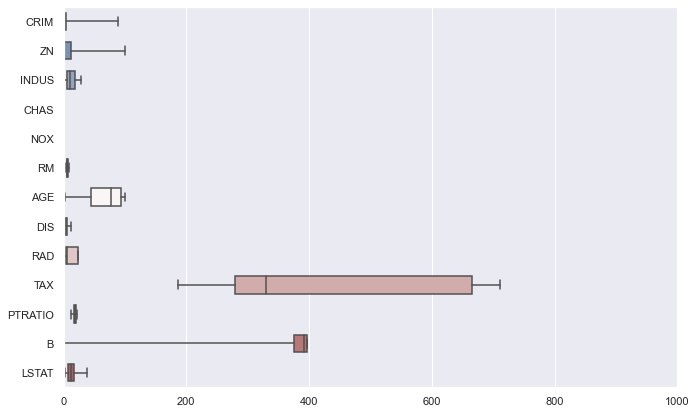

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(11,7))

plot01 = sns.boxplot(data=df_boston, orient='h',
            whis=[0, 100], width=.6, palette="vlag")
plot01.set(xlim=(0, 1000))


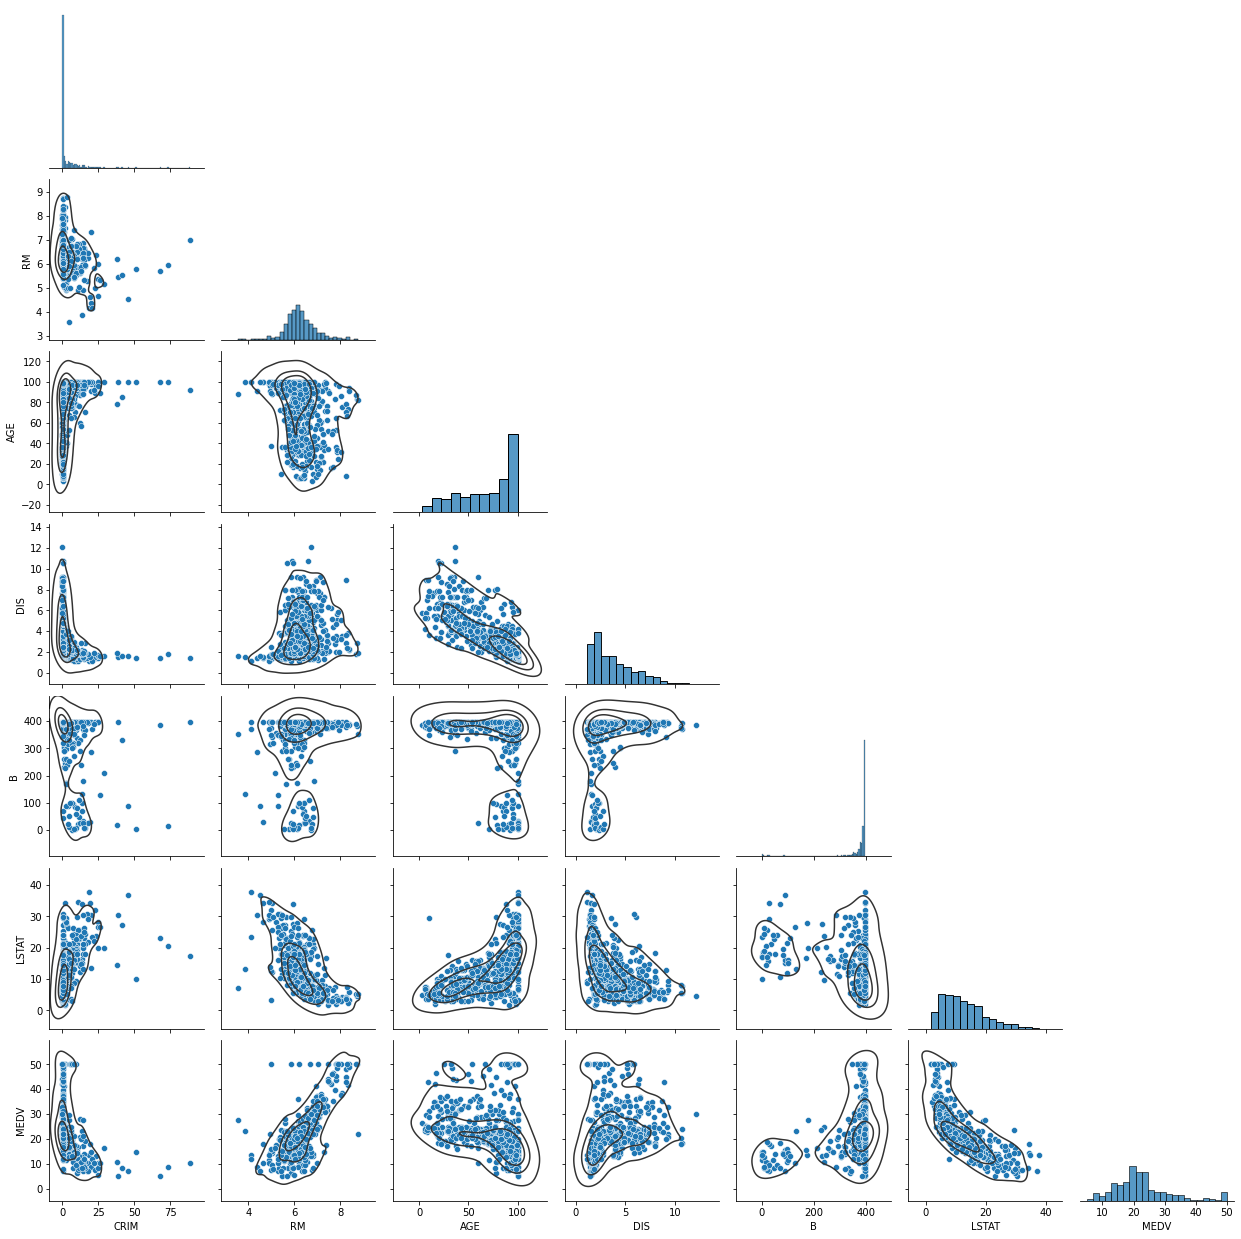

In [14]:
continous_features = ['CRIM', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']
df_pairplot = pd.concat([df_boston[continous_features], target], axis = 1)
plot02 = sns.pairplot(df_pairplot, corner=True)
plot02.map_lower(sns.kdeplot, levels=4, color=".2")

## 2. Modelo de regresion lineal

In [12]:
# importamos el modelo lineal y algunas funciones para calcular la bondad de ajuste.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [13]:
# Instanciamos el modelo.
rl_model = linear_model.LinearRegression()

# Separamos los datos en entrenamiento y testeo:
X_train, X_test, y_train, y_test = train_test_split(df_boston, target, random_state = 127, test_size=0.2)

In [14]:
# Entrenamos el modelo
rl_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Calculamos las predicciones del modelo sobre los datos de entrenamiento
y_train_predicted_rl = rl_model.predict(X_train)
# Y sobre los datos de testeo
y_test_predicted_rl = rl_model.predict(X_test)

In [43]:
#Definimos una funcion para hacer un resumen de las metricas del modelo y generar una visualizacion de las predicciones y sus desvios:
def model_report(model, y_train_predicted, y_test_predicted, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    # Graficamos el modelo
    #fig, (ax01, ax02) = plt.subplots(1, 2, figsize=(13,5))

    plt.plot(y_train, y_train, '-.',c='grey')
    plt.scatter(y_train, y_train_predicted, s=30, c='r', marker='+', zorder=10)
    plt.ylabel("Predicciones de MEDV usando RM")
    plt.xlabel("Valores reales MEDV")
    plt.xlim(-5,55)
    plt.ylim(-5,55)
    plt.title('ENTRENAMIENTO - Modelo: ' + model.__class__.__name__ 
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()

    plt.plot(y_test, y_test, '-.',c='grey')
    plt.scatter(y_test, y_test_predicted, s=30, c='r', marker='+', zorder=10)
    plt.ylabel("Predicciones de MEDV usando RM")
    plt.xlabel("Valores reales MEDV")
    plt.xlim(-5,55)
    plt.ylim(-5,55)
    plt.title('TESTEO  - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()
    
    print('MESTRICAS EN ENTRENAMIENTO: \n')
    print('Error cuadratico medio:             ', mean_squared_error(y_train, y_train_predicted).round(3))
    print('Error absoluto medio:               ', mean_absolute_error(y_train, y_train_predicted).round(3))
    print('Raiz del error cuadratico medio:    ', np.sqrt(mean_absolute_error(y_train, y_train_predicted)).round(3))
    print(model.score(X_train, y_train).round(5))
    
    print('\n MESTRICAS EN TESTEO: \n')
    print('Error cuadratico medio:             ', mean_squared_error(y_test, y_test_predicted).round(3))
    print('Error absoluto medio:               ', mean_absolute_error(y_test, y_test_predicted).round(3))
    print('Raiz del error cuadratico medio:    ', np.sqrt(mean_absolute_error(y_test, y_test_predicted)).round(3))
    print(model.score(X_test, y_test).round(5))

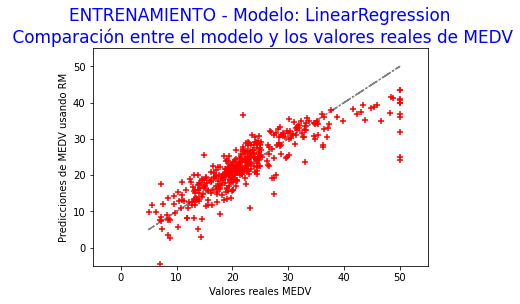

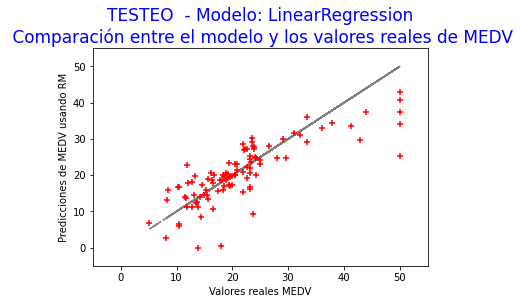

MESTRICAS EN ENTRENAMIENTO: 

Error cuadratico medio:              19.495
Error absoluto medio:                3.091
Raiz del error cuadratico medio:     1.758
0.76148

 MESTRICAS EN TESTEO: 

Error cuadratico medio:              32.63
Error absoluto medio:                3.928
Raiz del error cuadratico medio:     1.982
0.65269


In [44]:
# Aplicamos el reporte al modelo de regresion lineal
model_report(model = rl_model, y_train_predicted = y_train_predicted_rl, y_test_predicted = y_test_predicted_rl)

## 3. Modelo de vecinos mas cercanos (algoritmo adaptado a regresion)

In [18]:
# importamos el modelo regresor basado en KNN.
from sklearn.neighbors import KNeighborsRegressor


In [76]:
# Instanciamos el modelo.
knn_reg_model = KNeighborsRegressor(n_neighbors=5, p=1)

In [77]:
# Entrenamos el modelo
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor(p=1)

In [78]:
# Calculamos las predicciones del modelo sobre los datos de entrenamiento
y_train_predicted_knn = knn_reg_model.predict(X_train)
# Y sobre los datos de testeo
y_test_predicted_knn = knn_reg_model.predict(X_test)

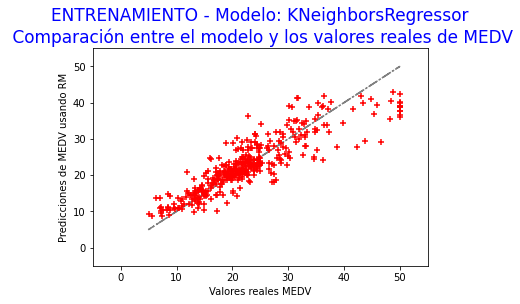

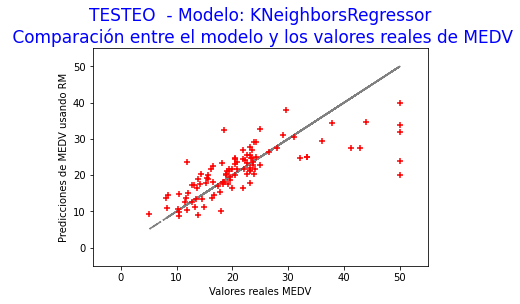

MESTRICAS EN ENTRENAMIENTO: 

Error cuadratico medio:              18.309
Error absoluto medio:                3.032
Raiz del error cuadratico medio:     1.741
0.776

 MESTRICAS EN TESTEO: 

Error cuadratico medio:              42.42
Error absoluto medio:                4.265
Raiz del error cuadratico medio:     2.065
0.54848


In [79]:
# Aplicamos el reporte al modelo de regresion basado en KNN
model_report(model = knn_reg_model, y_train_predicted = y_train_predicted_knn, y_test_predicted = y_test_predicted_knn)

In [61]:
x_random = X_train.sample().values
x_random

array([[1.1747e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
        6.0090e+00, 8.2900e+01, 6.2267e+00, 5.0000e+00, 3.1100e+02,
        1.5200e+01, 3.9690e+02, 1.3270e+01]])

In [62]:
knn_reg_model.predict(x_random)

array([[25.531]])

In [63]:
knn_reg_model.predict(x_random + 0.5)

array([[25.531]])

## 4. Modelo de random forest (algoritmo adaptado a regresion)

In [26]:
# importamos el modelo de ensamble Random Forest.
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
# Instanciamos el modelo.
rlf_model = DecisionTreeRegressor(criterion = 'mse', min_samples_split = 6, max_depth = 15)
rf_reg_model = RandomForestRegressor(criterion = 'mse', n_estimators = 1000, max_depth = 50, min_samples_split=2)

In [32]:
# Entrenamos el modelo
rlf_model.fit(X_train, y_train)
rf_reg_model.fit(X_train, y_train)

/tmp/ipykernel_6762/499505271.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=50, n_estimators=1000)

In [33]:
# Calculamos las predicciones del modelo sobre los datos de entrenamiento
y_train_predicted_rlf = rlf_model.predict(X_train)
y_train_predicted_rf_reg = rf_reg_model.predict(X_train)
# Y sobre los datos de testeo
y_test_predicted_rlf = rlf_model.predict(X_test)
y_test_predicted_rf_reg = rf_reg_model.predict(X_test)

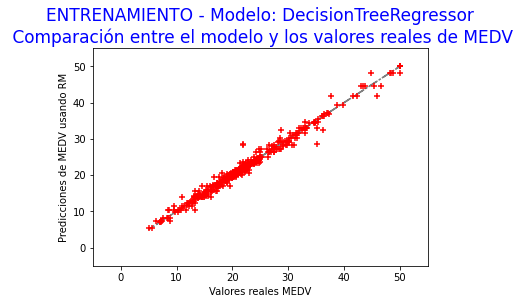

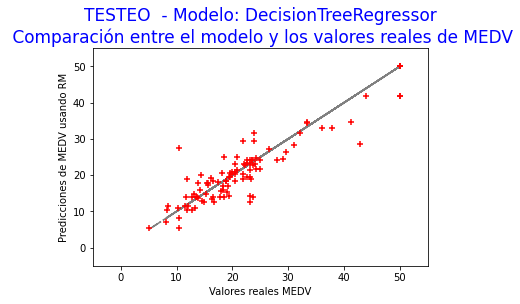

MESTRICAS EN ENTRENAMIENTO: 

Error cuadratico medio:              1.171
Error absoluto medio:                0.669
Raiz del error cuadratico medio:     0.818
0.98568

 MESTRICAS EN TESTEO: 

Error cuadratico medio:              16.526
Error absoluto medio:                2.784
Raiz del error cuadratico medio:     1.669
0.8241


In [46]:
# Aplicamos el reporte al modelo de regresion basado en un árbol de decision
model_report(model = rlf_model, y_train_predicted = y_train_predicted_rlf, y_test_predicted = y_test_predicted_rlf)

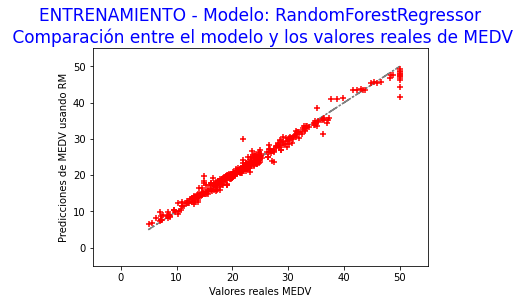

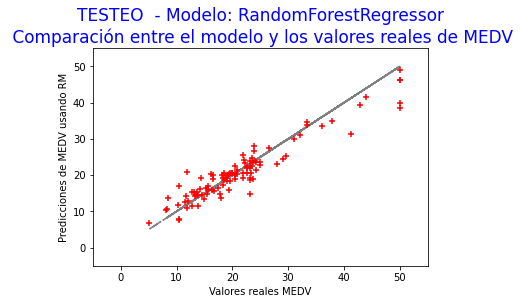

MESTRICAS EN ENTRENAMIENTO: 

Error cuadratico medio:              1.542
Error absoluto medio:                0.804
Raiz del error cuadratico medio:     0.896
0.98114

 MESTRICAS EN TESTEO: 

Error cuadratico medio:              9.95
Error absoluto medio:                2.271
Raiz del error cuadratico medio:     1.507
0.8941


In [47]:
# Aplicamos el reporte al modelo de regresion basado en un random forest
model_report(model = rf_reg_model, y_train_predicted = y_train_predicted_rf_reg, y_test_predicted = y_test_predicted_rf_reg)